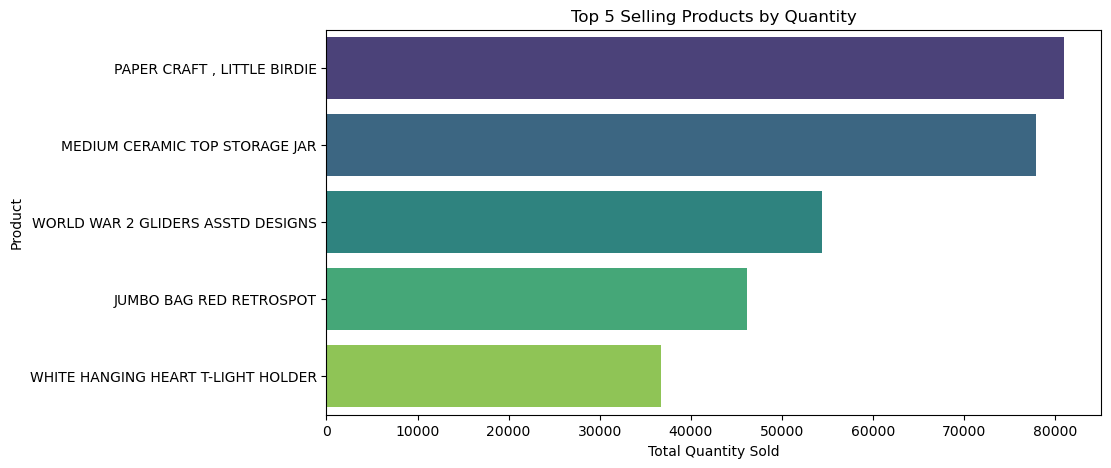

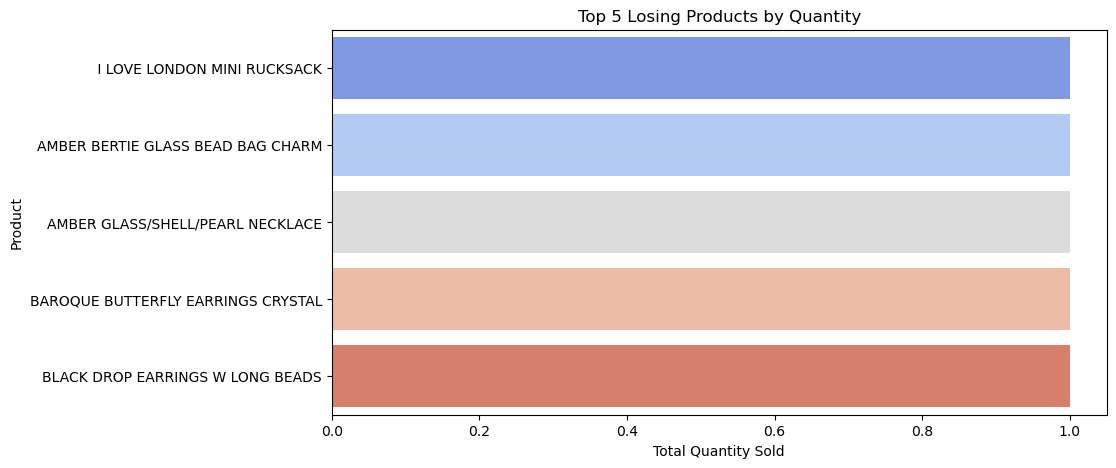

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv('OnlineRetail.csv')

# Data Cleaning
df = df.dropna(subset=['CustomerID'])  # Remove missing CustomerIDs
df = df[df['Quantity'] > 0]  # Remove negative quantities
df = df[df['UnitPrice'] > 0]  # Remove negative prices

# Create Total Price Column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Save Cleaned Data
df.to_csv('OnlineRetail_Cleaned.csv', index=False)

def top_selling_products(df, top_n=5):
    top_products = df.groupby('Description')['Quantity'].sum().nlargest(top_n).reset_index()
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Quantity', y='Description', hue='Description', data=top_products, palette='viridis', legend=False)
    plt.title(f'Top {top_n} Selling Products by Quantity')
    plt.xlabel('Total Quantity Sold')
    plt.ylabel('Product')
    plt.show()

def bottom_selling_products(df, bottom_n=5):
    bottom_products = df.groupby('Description')['Quantity'].sum().nsmallest(bottom_n).reset_index()
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Quantity', y='Description', hue='Description', data=bottom_products, palette='coolwarm', legend=False)
    plt.title(f'Top {bottom_n} Losing Products by Quantity')
    plt.xlabel('Total Quantity Sold')
    plt.ylabel('Product')
    plt.show()



# Run Analysis
top_selling_products(df)
bottom_selling_products(df)




In [15]:
def total_sales_by_country(df):
    country_sales = df.groupby('Country')['TotalPrice'].sum()
    country_sales_percentage = (country_sales / country_sales.sum()) * 100
    top_5_countries = country_sales_percentage.sort_values(ascending=False).head(5)
    
    plt.figure(figsize=(12, 6))
    top_5_countries.plot(kind='bar', color='skyblue')
    plt.title('Top 5 Countries by Total Sales Percentage')
    plt.xlabel('Country')
    plt.ylabel('Percentage of Total Sales')
    plt.xticks(rotation=45)
    plt.show()
    
    return top_5_countries

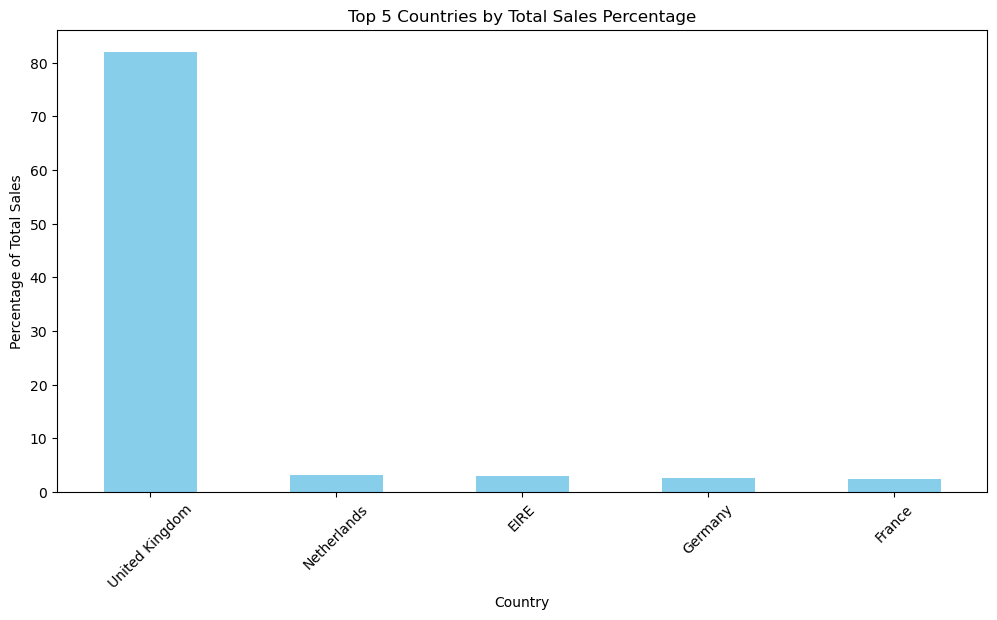

Country
United Kingdom    82.011638
Netherlands        3.203156
EIRE               2.979842
Germany            2.568249
France             2.345578
Name: TotalPrice, dtype: float64


In [17]:
country_sales_percentage = total_sales_by_country(df)
print(country_sales_percentage)


In [25]:
def total_sales_by_year(df):
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M")
    df['Year'] = df['InvoiceDate'].dt.year
    yearly_sales = df.groupby('Year')['TotalPrice'].sum()
    
    return yearly_sales

In [27]:
yearly_sales = total_sales_by_year(df)
print(yearly_sales)

Year
2010     572713.890
2011    8338694.014
Name: TotalPrice, dtype: float64
